In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")  

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
from os import path
path = '/content/drive/MyDrive/CSV/housing.csv'
df = pd.read_csv(path)

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


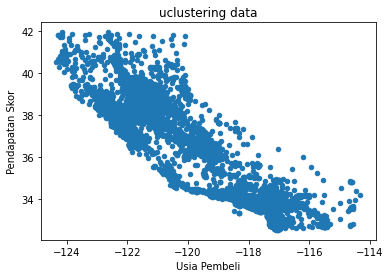

In [107]:
df.plot(kind='scatter', x='longitude', y='latitude')
#plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1])
plt.xlabel('Usia Pembeli')
plt.ylabel('Pendapatan Skor')
plt.title('uclustering data')
plt.show()

In [108]:
#membaca 2 feature
df = df[["longitude","latitude"]]
df.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [109]:
inertia_list = []
for num_clusters in np.arange(1, 21):
  kmeans =KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)

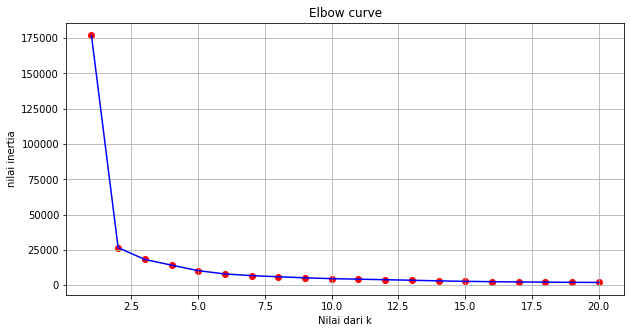

In [110]:
#plotting menggunakan elbow curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1,21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('Nilai dari k')
plt.ylabel('nilai inertia')
plt.title('Elbow curve')
plt.show()

In [111]:
#Step 1
k = 3 #asumsikan kita akan mencari cluster
np.random.seed(40)

#disini kita akan mendapatkan 3 point random centroid
random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(-124,-114), np.random.randint(34,42)])
  print('Randomly selected points as random_centroids:', random_centroids)

Randomly selected points as random_centroids: [[-118, 37]]
Randomly selected points as random_centroids: [[-118, 37], [-117, 39]]
Randomly selected points as random_centroids: [[-118, 37], [-117, 39], [-116, 34]]


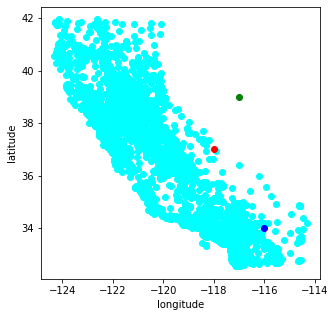

In [112]:
#plotting random centroid tiap segmen
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [113]:
#Langkah kedua

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new

In [114]:
df_new = assignment(df_new, random_centroids)
df_new.head()


,longitude,latitude,total_rooms 0,total_rooms 1,total_rooms 2,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,longitude 0,longitude 1,longitude 2,Closest_Centroid,Color
0,-122.23,37.88,4.320567,5.348579,7.339435,4.320567,5.348579,7.339435,4.320567,5.348579,7.339435,0,r
1,-122.22,37.86,4.306739,5.343033,7.320383,4.306739,5.343033,7.320383,4.306739,5.343033,7.320383,0,r
2,-122.24,37.85,4.324361,5.364709,7.332128,4.324361,5.364709,7.332128,4.324361,5.364709,7.332128,0,r
3,-122.25,37.85,4.334167,5.374477,7.340640,4.334167,5.374477,7.340640,4.334167,5.374477,7.340640,0,r
4,-122.25,37.85,4.334167,5.374477,7.340640,4.334167,5.374477,7.340640,4.334167,5.374477,7.340640,0,r


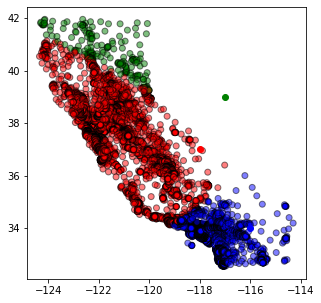

In [115]:
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])

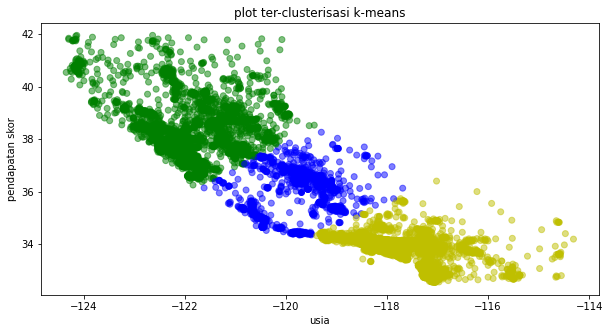

In [116]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'} #penentuan warna plot
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)
plt.scatter(df['longitude'], df["latitude"], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('usia')
plt.ylabel('pendapatan skor')
plt.title('plot ter-clusterisasi k-means')
plt.show()